In [6]:
import numpy as np 
import pandas as pd
import random
from scipy.stats import mode


%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Генерация фиктивных данных
np.random.seed(42)
random.seed(42)

# параметры для создание датафрейма
citys = ['London', 'New York', 'Sydney', 'Tokyo', 'Paris']
category = ['A', 'B', 'C']
k = 500

# Создание датафрейма
data = {
    'City': random.choices(citys, k=k) ,
    'Year': random.choices(range(2010, 2021), k=k),
    'Sales': np.random.randint(1000, 10000, size=k),
    'Profit': np.random.uniform(0, 5000, size=k),
    'Category': random.choices(category, k=k)
}

df = pd.DataFrame(data)
df["Year"] =  pd.to_datetime(df["Year"], format='ISO8601')
df.head(5)

,City,Year,Sales,Profit,Category
0,Tokyo,2016-01-01,8270,3440.150051,A
1,London,2010-01-01,1860,4184.819371,C
2,New York,2014-01-01,6390,4334.343527,B
3,New York,2016-01-01,6191,4192.403819,C
4,Tokyo,2010-01-01,6734,2130.457375,B


# Zadania do wizualizacji

##  Wyświetl histogram sprzedaży według miasta.
Отобразить гистограмму продаж по городам.

In [108]:
sales_by_sity[sales_by_sity == np.median(sales_by_sity)].index

Index(['Tokyo'], dtype='object', name='City')

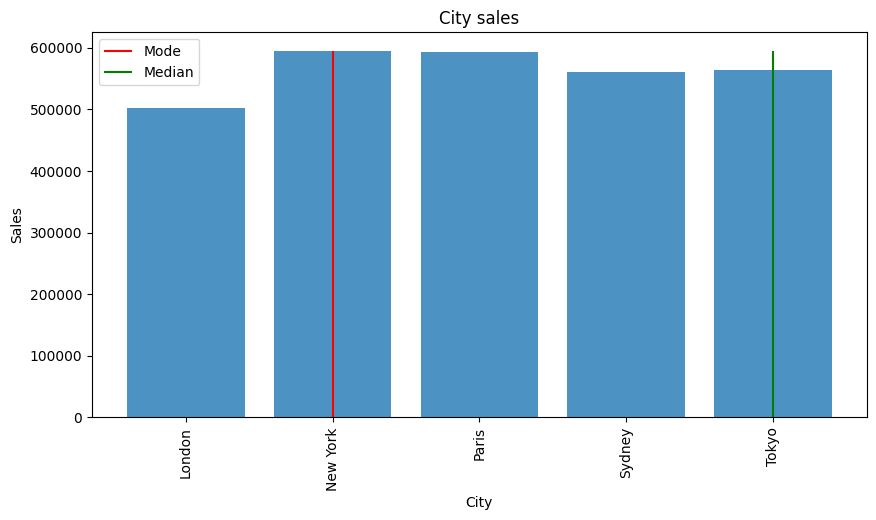

In [7]:
sales_by_sity = df.groupby("City", as_index = True).Sales.sum()

fig, ax = plt.subplots(figsize= (10,5))

ax.bar(sales_by_sity.index, sales_by_sity, alpha = .8)
ax.vlines(mode(sales_by_sity)[1], 0, np.max(sales_by_sity), 
          color = "r", label = "Mode")
ax.vlines( sales_by_sity[sales_by_sity == np.median(sales_by_sity)].index,
          0, np.max(sales_by_sity), color = "g", label = "Median")

ax.legend()
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City sales")
plt.xticks(rotation = 90)
plt.show();

##  Zbuduj wykres słupkowy zarobków według roku.
Построить столбчатую диаграмму прибыли по годам.


In [113]:
df.head(1)

,City,Year,Sales,Profit,Category
0,Tokyo,2016-01-01,8270,3440.150051,A


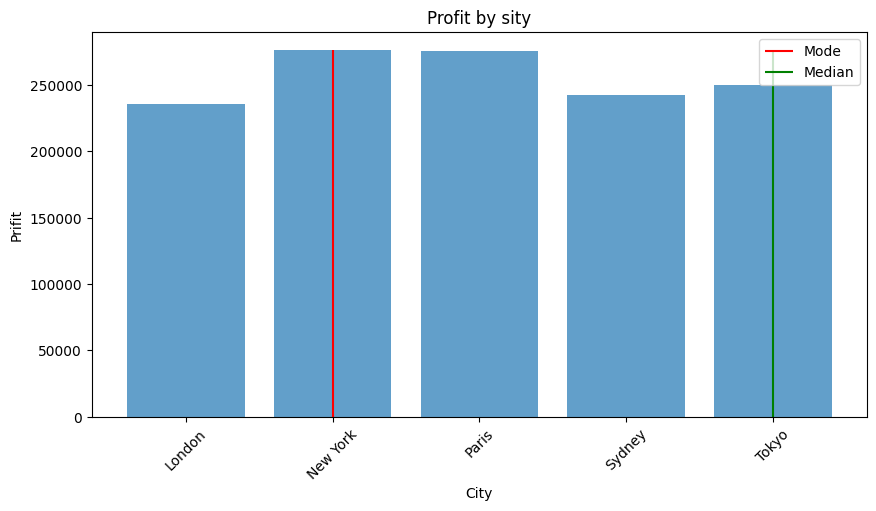

In [8]:
profit_by_city = df.groupby("City", as_index= True).Profit.sum()

fig, ax = plt.subplots(figsize= (10,5))

ax.bar(profit_by_city.index, profit_by_city, alpha= .7)
ax.vlines(mode(profit_by_city)[1], 0, np.max(profit_by_city), 
          label= "Mode", color= "r")

med = np.median(profit_by_city)
ax.vlines(profit_by_city[profit_by_city == med].index, 0, np.max(profit_by_city),
          label= "Median", color= "g")

ax.legend()

plt.title("Profit by sity")
plt.xlabel("City")
plt.ylabel("Prifit")
plt.xticks(rotation= 45)

plt.show()


##  Utwórz horroplet, aby zwizualizować sprzedaż według miasta.
Создать хороплетную карту для визуализации продаж по городам.


##  Zbadaj sezonowość sprzedaży według miesięcy i przedstaw ją na wykresie.
Изучить сезонность продаж по месяцам и представить ее на графике.


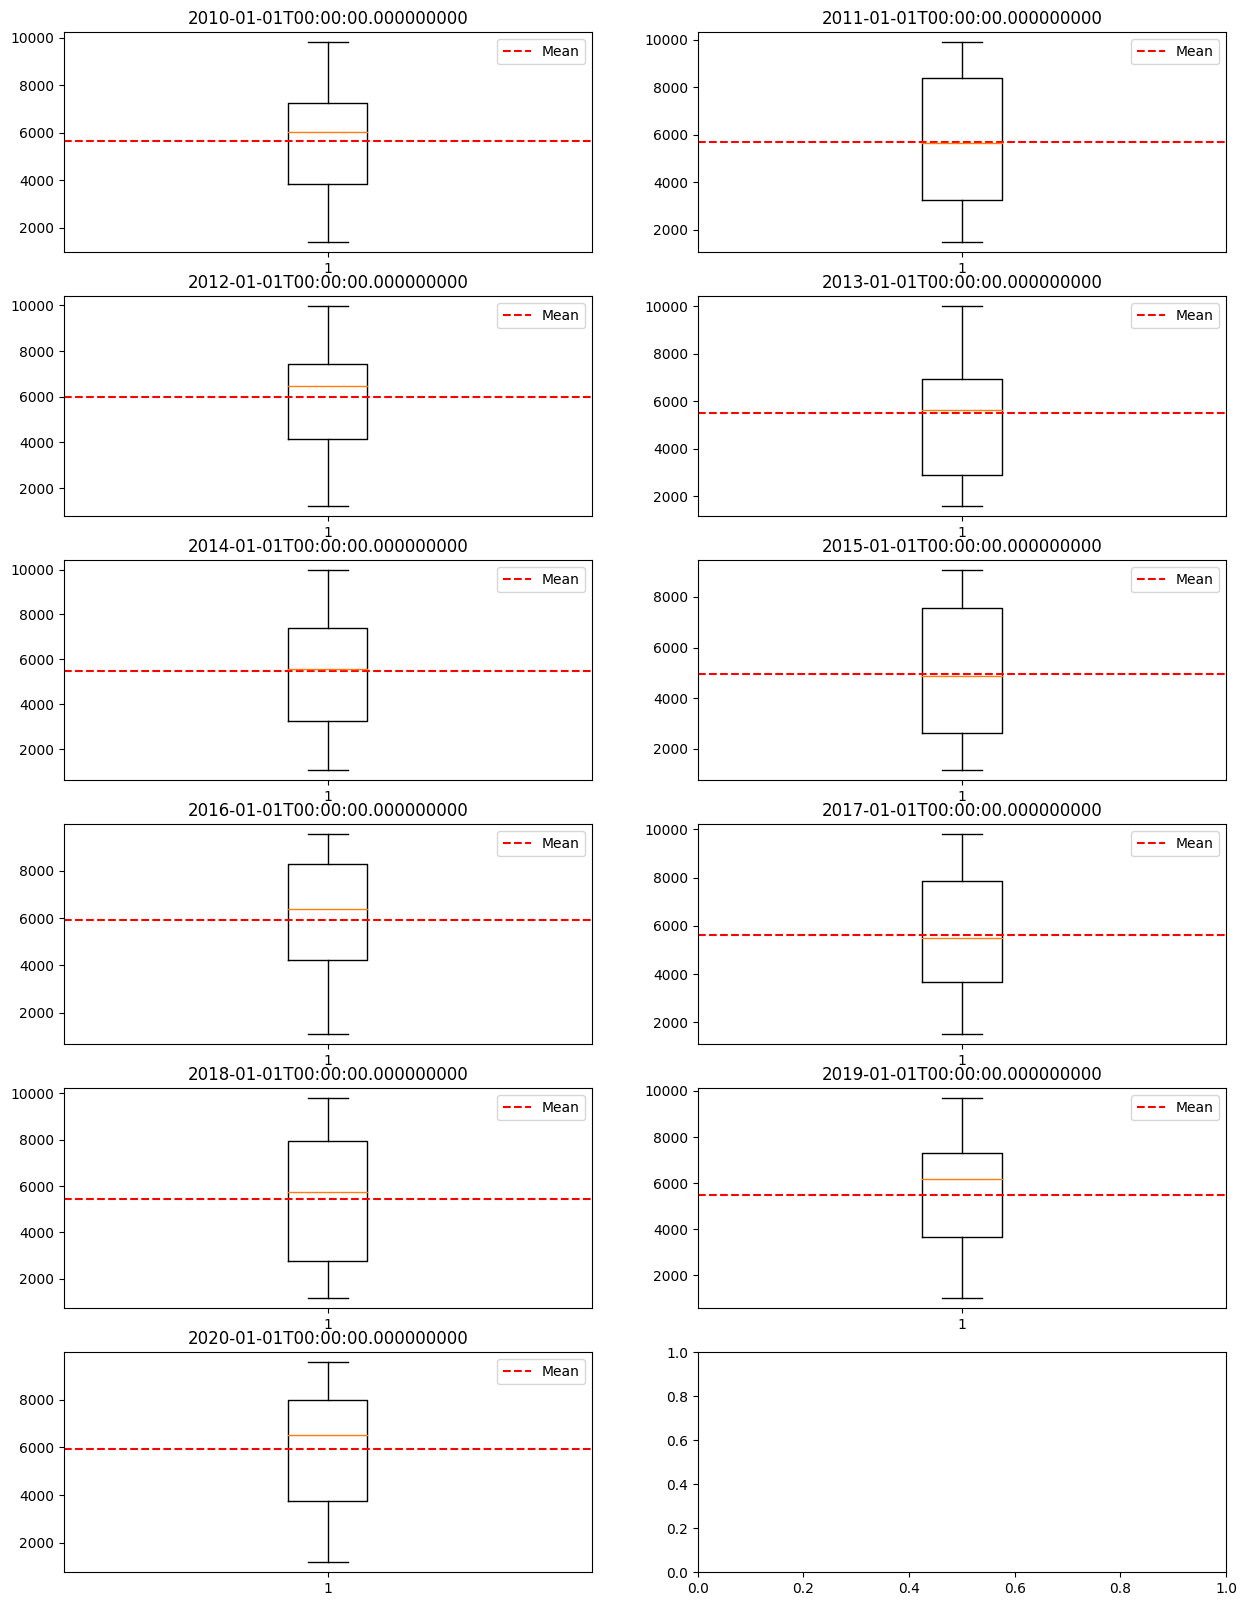

In [9]:
years = sorted(list(pd.unique(df.Year)))
data = pd.DataFrame()
for year in years:
    data[year] = df.loc[df["Year"] == year, "Sales"].reset_index(drop =True)
    
data.fillna(0, inplace = True)

num_years = len(years)
num_rows = (num_years + 1) // 2
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, year in enumerate(years):
    row = i // num_cols
    col = i % num_cols
    ax[row, col].boxplot(data[year])
    ax[row, col].set_title(str(year))
    ax[row, col].axhline(np.mean(data[year]), color='red', linestyle='--', label='Mean')
    
    ax[row, col].legend()

plt.show()

##  Zbuduj wykres kołowy, aby pokazać proporcje kategorii produktów.
Построить круговую диаграмму для отображения доли категорий продуктов.

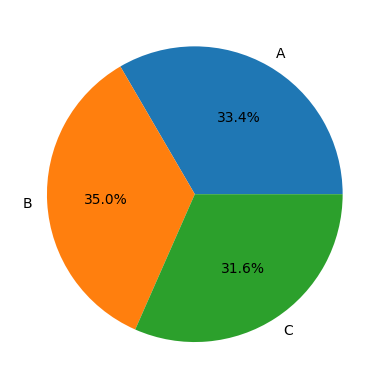

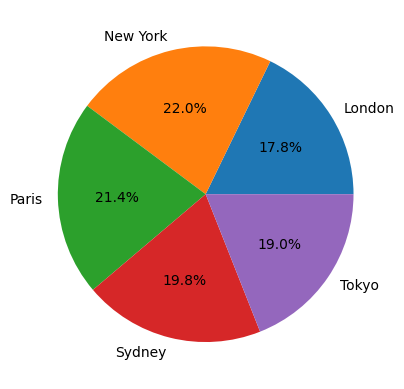

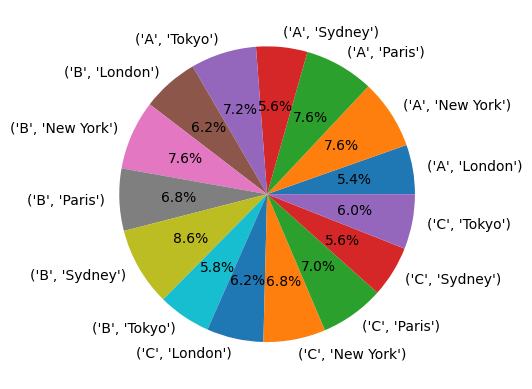

In [206]:
data_cat = df.groupby("Category", as_index= True).count()
data_city = df.groupby("City", as_index= True).count()
oll_data = df.groupby(["Category","City"], as_index= True).count()

data

for i in (data_cat, data_city, oll_data):
    fig, ax = plt.subplots()
    ax.pie(i["Profit"], labels= i.index,  autopct='%1.1f%%' )

    plt.show()

## Zbuduj wykres liniowy, aby śledzić dynamikę sprzedaży na przestrzeni lat dla każdego miasta.
Построить линейный график для отслеживания динамики продаж по годам для каждого города.

In [18]:
df.reset_index()

,City,Year,Sales,Profit,Category
0,Tokyo,2016-01-01,8270,3440.150051,A


In [79]:
data

,Year,City,Sales
0,2010-01-01,London,26564
1,2010-01-01,New York,39972
2,2010-01-01,Paris,32352
3,2010-01-01,Sydney,38822
4,2010-01-01,Tokyo,60887
5,2011-01-01,London,36208
6,2011-01-01,New York,60134
7,2011-01-01,Paris,62096
8,2011-01-01,Sydney,53385
9,2011-01-01,Tokyo,41891


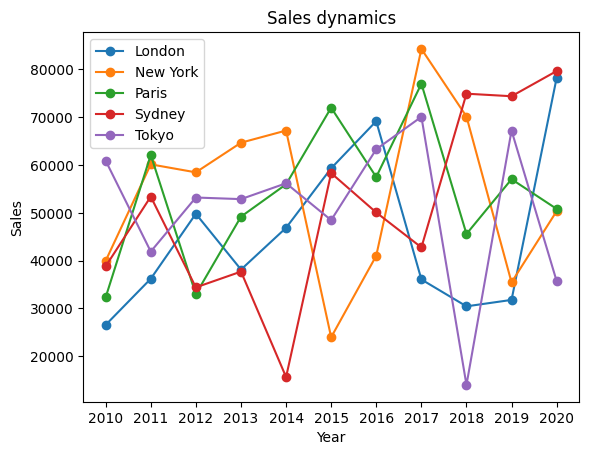

In [87]:
data = df.groupby(["Year", "City"], as_index= False)["Sales"].sum()

fig, ax = plt.subplots()

for city in data.City.unique():
    
    ax.plot(data.loc[data.City == city, "Year"],
            data.loc[data.City == city, "Sales"],
            marker='o', label=city)

ax.set_xlabel("Year")
ax.set_ylabel("Sales")
ax.set_title("Sales dynamics") # sales dynamics
    
ax.legend()
plt.show()

## Utwórz pudełko z wąsami (boxplot), aby porównać rozkład zysków w różnych kategoriach produktów.
создать ящик с усами (box plot) для сравнения распределения прибыли по категориям продуктов.

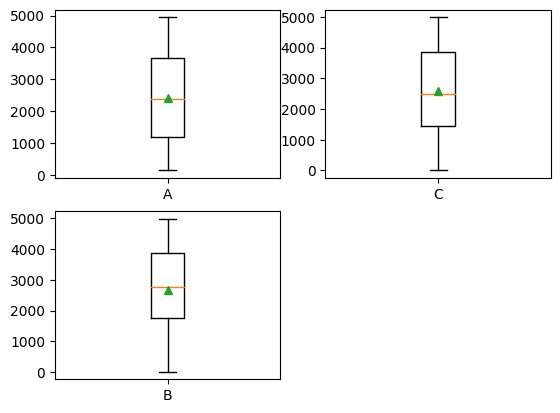

In [133]:
fig, ax = plt.subplots()
for i, category in enumerate(df.Category.unique()):
    plt.subplot(221 + i)
    
    plt.boxplot(df.loc[df.Category == category, "Profit"],
              labels= category, showmeans=True)
plt.show()


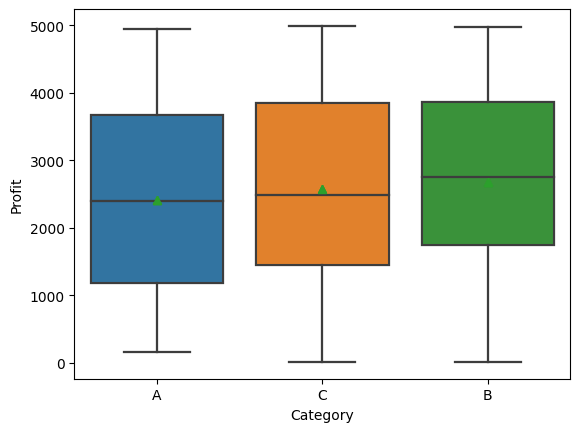

In [118]:
for  category in df.Category.unique():
    sns.boxplot( x = "Category" ,y = "Profit", data = df,  showmeans=True)

## Narysuj wykres punktowy, aby zbadać związek między sprzedażą a zyskiem dla każdego miasta.
Построить scatter plot, чтобы исследовать связь между продажами и прибылью для каждого города.

In [142]:
df.City.unique()

array(['Tokyo', 'London', 'New York', 'Paris', 'Sydney'], dtype=object)

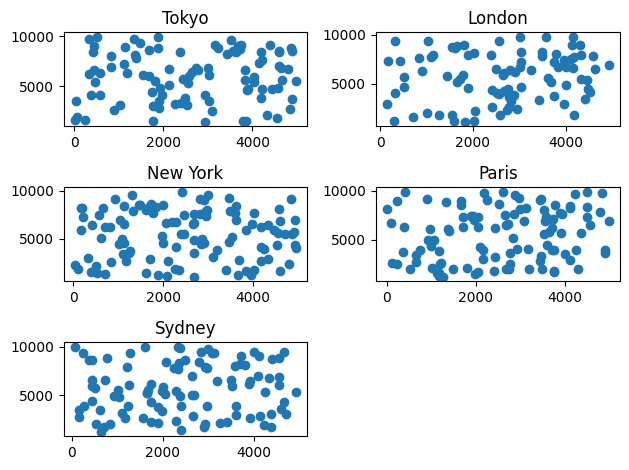

In [163]:
for i, city in enumerate(df.City.unique()):
    ax = plt.subplot(3, 2, i+1)
    ax.scatter(df.loc[df.City == city, "Profit"], 
               df.loc[df.City == city, "Sales"])
    
    ax.set_title(city)

plt.tight_layout()
plt.show(fig)



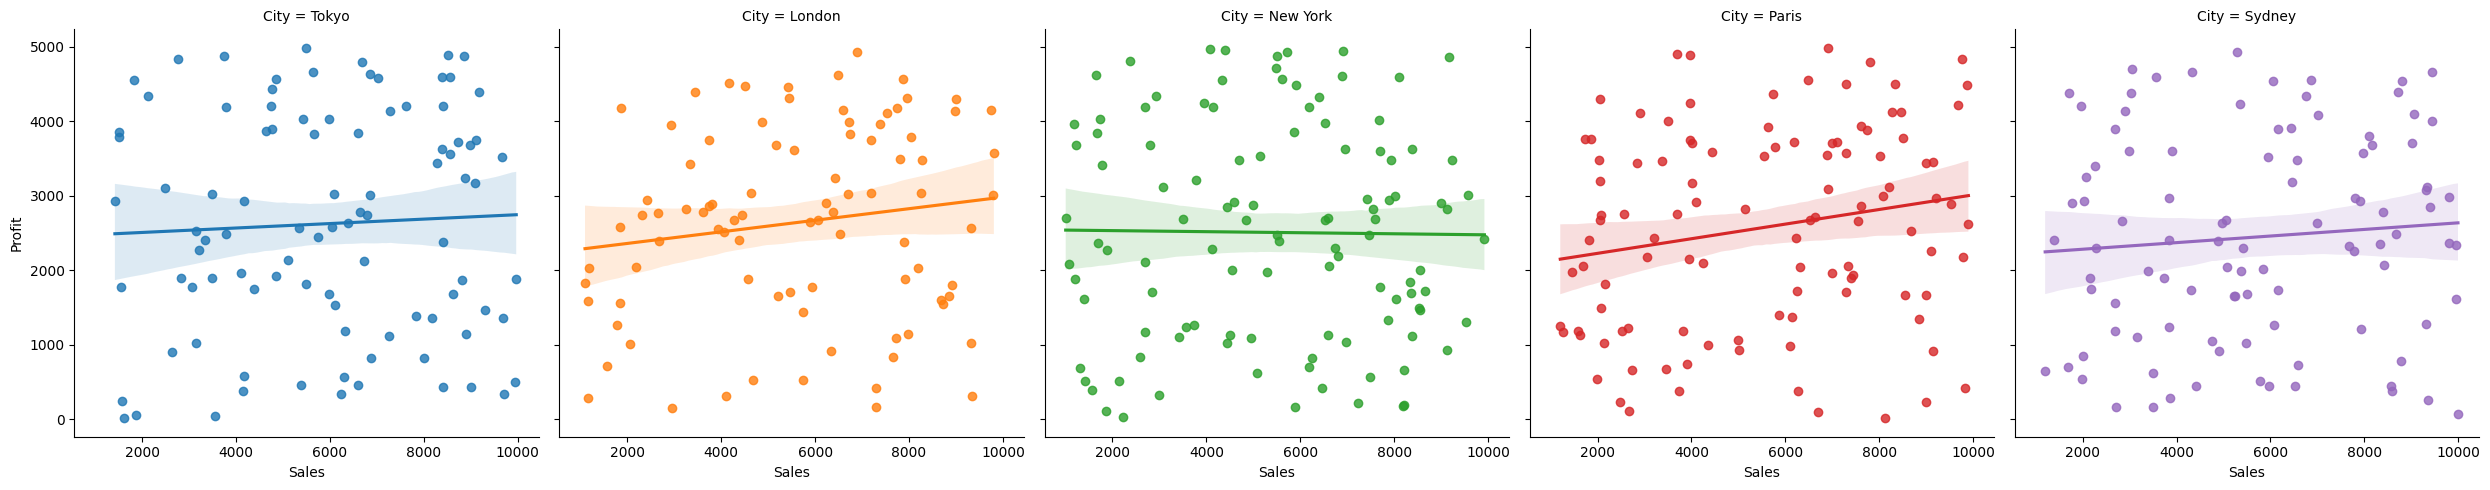

In [168]:
sns.lmplot(data= df, x="Sales", y="Profit" , hue="City", col="City" );

## Zbuduj wykres słupkowy, aby wyświetlić całkowitą sprzedaż według kategorii produktów.
Построить столбчатую диаграмму для отображения суммарных продаж по категориям продуктов.

## Utwórz wykres słupkowy, aby porównać sprzedaż według miasta w wybranym roku.
Создать столбчатую диаграмму, чтобы сравнить продажи по городам для выбранного года.

## Zbuduj wykres liniowy, aby śledzić zmiany zysków w czasie dla wybranego miasta.
Построить линейный график для отслеживания изменения прибыли в течение времени для выбранного города.

## Utwórz wykres kołowy, aby pokazać udział każdego miasta w całkowitej sprzedaży.
Создать круговую диаграмму для отображения доли каждого города в общих продажах.